What we learned before: KNN regression, model evaluation - MSE, little intuition - moving average (what is the difference?)

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd

# 1) Generate two-moons data
#X, y = make_moons(n_samples=300, noise=.3, random_state=42)
X, y = make_moons(n_samples=(250, 50), noise=.3, random_state=42)

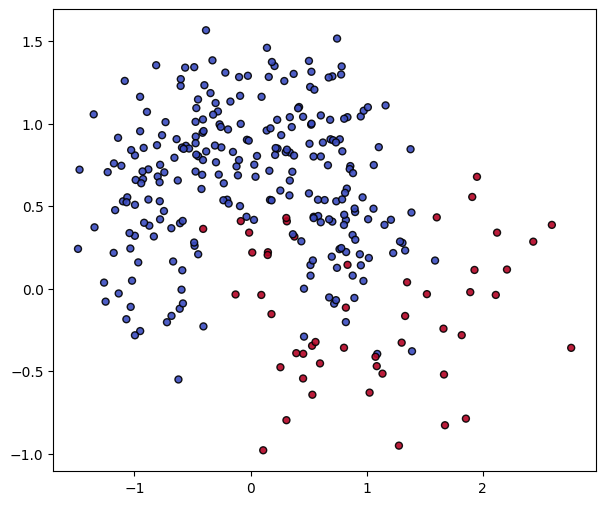

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))

# Training points
plt.scatter(X[:,0], X[:,1], c=y, s=25, edgecolor='k', alpha=0.9, label='train', cmap=plt.cm.coolwarm)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

The `stratify` parameter in `train_test_split` ensures that the proportion of classes in the original dataset is preserved in both the training and testing sets. This is particularly useful when dealing with imbalanced datasets to ensure that each class is adequately represented in both sets.

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 2) Fit KNN classifier
k = 30  # <- change k to see different boundaries
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_tr = knn.predict(X_train)

In [ ]:
# 5) Confusion matrix (labels assumed 0=negative, 1=positive)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

# 6) Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
recall = recall_score(y_test, y_pred, pos_label=1)  # = Sensitivity / TPR
specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
f1 = f1_score(y_test, y_pred, pos_label=1)
youden_j = recall + specificity - 1 if not np.isnan(specificity) else np.nan


tn, fp, fn, tp = confusion_matrix(y_train, y_pred_tr, labels=[0,1]).ravel()
accuracy_tr = accuracy_score(y_train, y_pred_tr)
precision_tr = precision_score(y_train, y_pred_tr, pos_label=1, zero_division=0)
recall_tr = recall_score(y_train, y_pred_tr, pos_label=1)  # = Sensitivity / TPR
specificity_tr = tn / (tn + fp) if (tn + fp) > 0 else np.nan
f1_tr = f1_score(y_train, y_pred_tr, pos_label=1)
youden_j_tr = recall + specificity - 1 if not np.isnan(specificity) else np.nan




# 7) Present metrics in a small table
metrics_df = pd.DataFrame({
    "metric": ["accuracy", "sensitivity (recall)", "specificity", "precision", "f1", "youden's J"],
    "value_test": [accuracy, recall, specificity, precision, f1, youden_j],
    "value_train": [accuracy_tr, recall_tr, specificity_tr, precision_tr, f1_tr, youden_j_tr]
})

metrics_df

,metric,value_test,value_train
0,accuracy,0.877778,0.904762
1,sensitivity (recall),0.333333,0.428571
2,specificity,0.986667,1.000000
3,precision,0.833333,1.000000
4,f1,0.476190,0.600000
5,youden's J,0.320000,0.320000


In [ ]:
# HW c) 1. compute tn, fp, fn, tp by using y_test, y_pred without using confusion_matrix
tn, fp, fn, tp =
# HW c) 2. compute accuracy, precisin, recall, specificity, f1, youden_j, without using sklearn functions. compute by your own.
accuracy =
precision =
recall =
specificity =
f1 =
youden_j =

# 7) Present metrics in a small table
metrics_df_my_own = pd.DataFrame({
    "metric": ["accuracy", "sensitivity (recall)", "specificity", "precision", "f1", "youden's J"],
    "value": [accuracy, recall, specificity, precision, f1, youden_j]
})
#print the following and check that they become 0s.
print(metrics_df_my_own[["value"]]-metrics_df[["value"]])


SyntaxError: invalid syntax (ipython-input-1117179709.py, line 2)

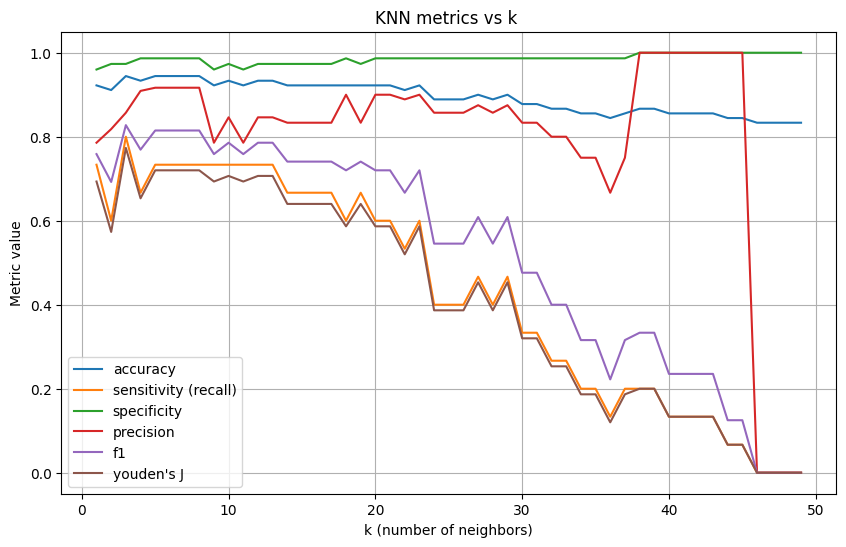

In [ ]:
k_values = np.arange(1, 50, 1)
results = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  # 4) Predictions and probabilities
  y_pred = knn.predict(X_test)

  # 5) Confusion matrix (labels assumed 0=negative, 1=positive)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

  # 6) Metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
  recall = recall_score(y_test, y_pred, pos_label=1)  # = Sensitivity / TPR
  specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
  f1 = f1_score(y_test, y_pred, pos_label=1)
  youden_j = recall + specificity - 1 if not np.isnan(specificity) else np.nan

  # 7) Present metrics in a small table


  results.append({
        "k": k,
        "accuracy": accuracy,
        "sensitivity (recall)": recall,
        "specificity": specificity,
        "precision": precision,
        "f1": f1,
        "youden's J": youden_j
    })

results_df = pd.DataFrame(results)
results_df.head()

ax = results_df.set_index("k").plot(figsize=(10,6), grid=True, title="KNN metrics vs k ")

ax.set_xlabel("k (number of neighbors)")
ax.set_ylabel("Metric value")
plt.show()

In [ ]:
k_values = np.arange(1, 50, 1)
results = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  # 4) Predictions and probabilities
  y_pred_test = knn.predict(X_test)
  y_pred_train = knn.predict(X_train)

  # 5) Confusion matrix (labels assumed 0=negative, 1=positive)
  tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test, labels=[0,1]).ravel()
  tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train, labels=[0,1]).ravel()


  # 6) Metrics for test set
  accuracy_test = accuracy_score(y_test, y_pred_test)
  precision_test = precision_score(y_test, y_pred_test, pos_label=1, zero_division=0)
  recall_test = recall_score(y_test, y_pred_test, pos_label=1)  # = Sensitivity / TPR
  specificity_test = tn_test / (tn_test + fp_test) if (tn_test + fp_test) > 0 else np.nan
  f1_test = f1_score(y_test, y_pred_test, pos_label=1)
  youden_j_test = recall_test + specificity_test - 1 if not np.isnan(specificity_test) else np.nan

  # 6) Metrics for train set
  accuracy_train = accuracy_score(y_train, y_pred_train)
  precision_train = precision_score(y_train, y_pred_train, pos_label=1, zero_division=0)
  recall_train = recall_score(y_train, y_pred_train, pos_label=1)  # = Sensitivity / TPR
  specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) > 0 else np.nan
  f1_train = f1_score(y_train, y_pred_train, pos_label=1)
  youden_j_train = recall_train + specificity_train - 1 if not np.isnan(specificity_train) else np.nan


  results.append({
        "k": k,
        "accuracy_test": accuracy_test,
        "sensitivity (recall)_test": recall_test,
        "specificity_test": specificity_test,
        "precision_test": precision_test,
        "f1_test": f1_test,
        "youden's J_test": youden_j_test,
        "accuracy_train": accuracy_train,
        "sensitivity (recall)_train": recall_train,
        "specificity_train": specificity_train,
        "precision_train": precision_train,
        "f1_train": f1_train,
        "youden's J_train": youden_j_train,

    })

results_df = pd.DataFrame(results)
display(results_df.head())

,k,accuracy_test,sensitivity (recall)_test,specificity_test,precision_test,f1_test,youden's J_test,accuracy_train,sensitivity (recall)_train,specificity_train,precision_train,f1_train,youden's J_train
0,1,0.922222,0.733333,0.960000,0.785714,0.758621,0.693333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,0.911111,0.600000,0.973333,0.818182,0.692308,0.573333,0.961905,0.771429,1.000000,1.000000,0.870968,0.771429
2,3,0.944444,0.800000,0.973333,0.857143,0.827586,0.773333,0.966667,0.885714,0.982857,0.911765,0.898551,0.868571
3,4,0.933333,0.666667,0.986667,0.909091,0.769231,0.653333,0.957143,0.771429,0.994286,0.964286,0.857143,0.765714
4,5,0.944444,0.733333,0.986667,0.916667,0.814815,0.720000,0.966667,0.857143,0.988571,0.937500,0.895522,0.845714


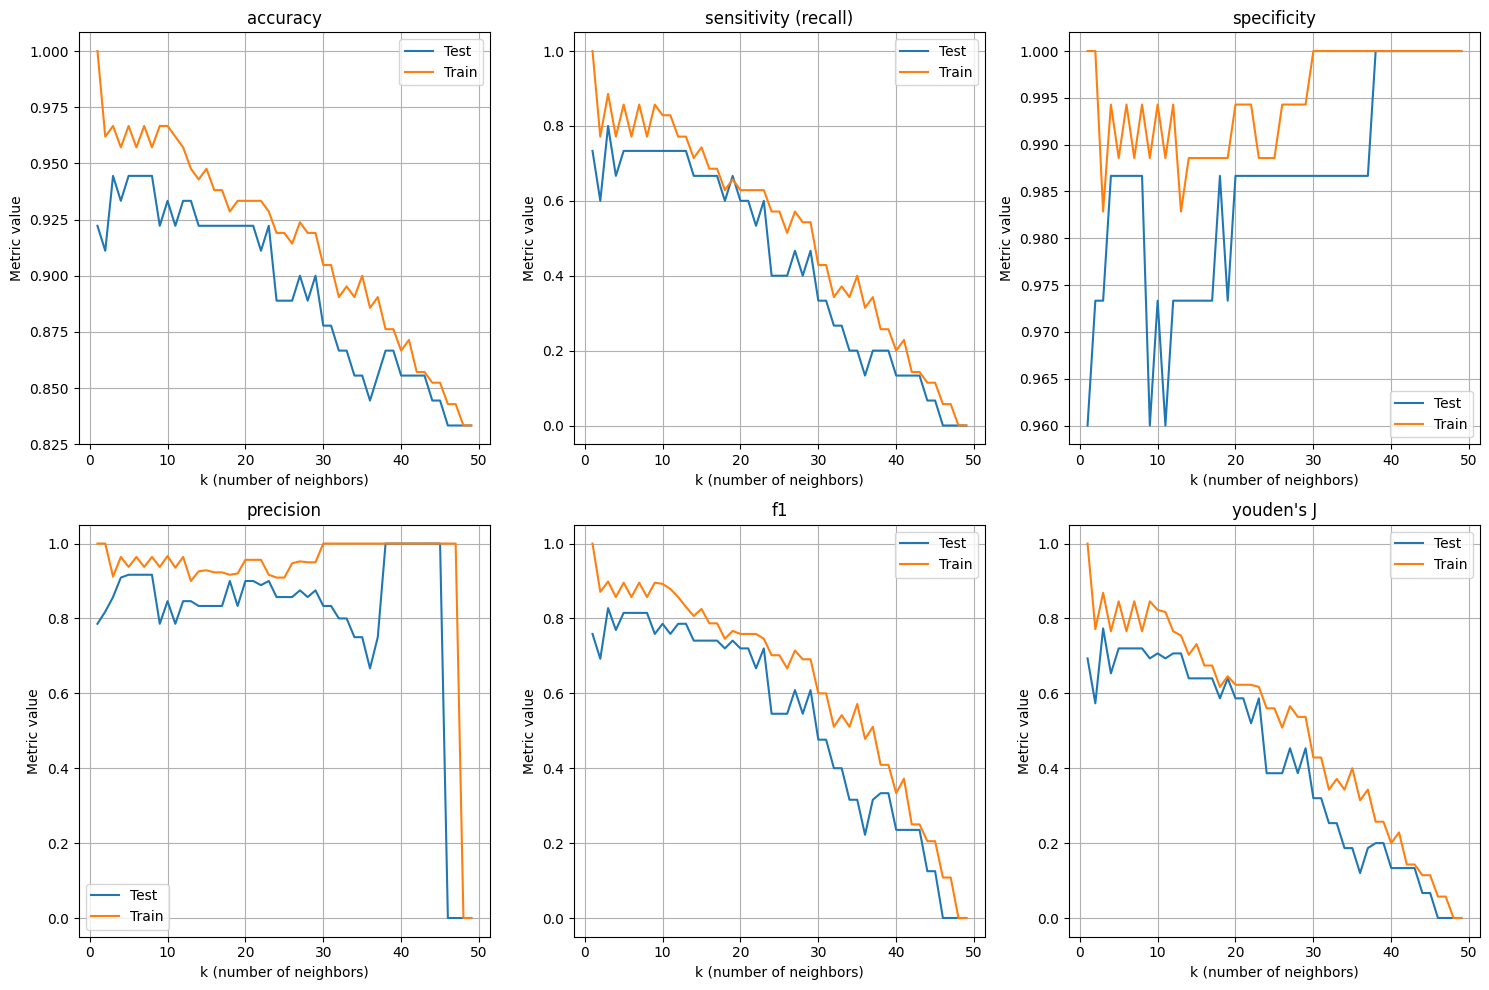

In [ ]:
import matplotlib.pyplot as plt

metrics_to_plot = ["accuracy", "sensitivity (recall)", "specificity", "precision", "f1", "youden's J"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_plot):
    axes[i].plot(results_df["k"], results_df[f"{metric}_test"], label="Test")
    axes[i].plot(results_df["k"], results_df[f"{metric}_train"], label="Train")
    axes[i].set_title(metric)
    axes[i].set_xlabel("k (number of neighbors)")
    axes[i].set_ylabel("Metric value")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
n_repeats = 100
results = []

for k in k_values:
    metrics_list = []  # 반복마다 metric 저장
    for i in range(n_repeats):
        # 매번 다른 split

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, stratify=y, random_state=42*i+42        )

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        youden_j = recall + specificity - 1 if not np.isnan(specificity) else np.nan

        metrics_list.append([accuracy, recall, specificity, precision, f1, youden_j])

    # 평균내기
    metrics_mean = np.nanmean(metrics_list, axis=0)
    results.append({
        "k": k,
        "accuracy": metrics_mean[0],
        "sensitivity (recall)": metrics_mean[1],
        "specificity": metrics_mean[2],
        "precision": metrics_mean[3],
        "f1": metrics_mean[4],
        "youden's J": metrics_mean[5]
    })

results_df = pd.DataFrame(results)
print(results_df.head())

   k  accuracy  sensitivity (recall)  specificity  precision        f1  \
0  1  0.932000              0.774000     0.963600   0.818835  0.790783   
1  2  0.926667              0.631333     0.985733   0.907669  0.735333   
2  3  0.952222              0.828667     0.976933   0.883335  0.851448   
3  4  0.947222              0.754667     0.985733   0.918342  0.823939   
4  5  0.952778              0.804000     0.982533   0.906597  0.849374   

   youden's J  
0    0.737600  
1    0.617067  
2    0.805600  
3    0.740400  
4    0.786533  


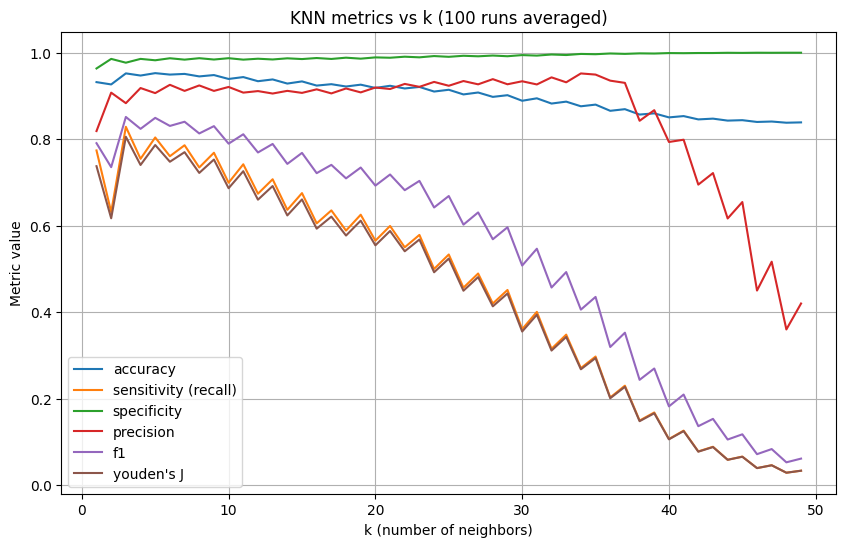

In [ ]:
import matplotlib.pyplot as plt


ax = results_df.set_index("k").plot(figsize=(10,6), grid=True, title=f"KNN metrics vs k ({n_repeats} runs averaged)")

ax.set_xlabel("k (number of neighbors)")
ax.set_ylabel("Metric value")
plt.show()

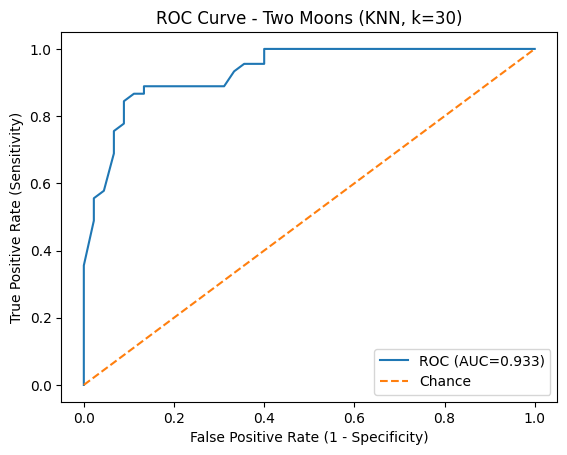

In [ ]:
#ROC curve & AUC
# For ROC, we need scores or probabilities for the positive class (label=1)
y_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
auc_val = roc_auc_score(y_test, y_proba)



# 8) Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={auc_val:.3f})")
plt.plot([0,1], [0,1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve - Two Moons (KNN, k=30)")
plt.legend()
plt.show()

# Also print confusion matrix components for clarity
#tn, fp, fn, tp, accuracy, precision, recall, specificity, f1, youden_j, auc_val
